In [2]:
import sys
sys.path = ['/nfs/gns/homes/willj/anaconda3/envs/GTEx/lib/python3.5/site-packages'] + sys.path
# sys.path = ['/hps/nobackup/research/stegle/users/willj/GTEx/deps/qvalue/qvalue'] + sys.path
import pickle
import math
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import pearsonr
import os
%matplotlib inline
import qvalue

In [20]:
real_pvalues = np.array(pickle.load(open('../data/processed/association_results/expression/inception_50_-1.h5/small/{}/mean/pvalues/component{}_sh0_fl0.py'.format(tissue,0),'rb'))[1])

In [21]:
from statsmodels.sandbox.stats.multicomp import multipletests

In [26]:
multipletests(real_pvalues, method='fdr_bh')[0]

array([False, False, False, ..., False, False, False], dtype=bool)

In [ ]:
all_real_pvalues = []
all_shuffled_pvalues= []

for c in range(1024):
    if c%50 == 0:
        print (c)
    real_pvalues = np.array(pickle.load(open('../data/processed/association_results/expression/inception_50_-1.h5/small/{}/mean/pvalues/component{}_sh0_fl0.py'.format(tissue,c),'rb'))[1])
    shuffled_data = pickle.load(open('../data/processed/association_results/expression/inception_50_-1.h5/small/{}/mean/pvalues/component{}_sh1_fl0.py'.format(tissue,c),'rb'))
    shuffled_pvalues = np.array(shuffled_data[1])
    all_real_pvalues.append(list(real_pvalues))
    all_shuffled_pvalues.append(list(shuffled_pvalues))

0


In [75]:
x = np.array(all_real_pvalues).flatten()

In [76]:
results = multipletests(x, method='fdr_bh', alpha=0.01)

In [79]:
count = 0
for x in results[0]:
    if x:
        count += 1

In [83]:
y = np.array(all_real_pvalues).flatten()[results[0]]

In [86]:
from qvalue.qvalue import estimate

In [88]:
z = estimate(np.array(all_real_pvalues).flatten())

In [93]:
z[0].min()

9.1971573732429319e-13

In [94]:
num_significant_real_pvalues = []
num_significant_shuffled_pvalues = []

for c in range(1024):
    if c%50 == 0:
        print (c)
    real_pvalues = np.array(pickle.load(open('../data/processed/association_results/expression/inception_50_-1.h5/small/{}/mean/pvalues/component{}_sh0_fl0.py'.format(tissue,c),'rb'))[1])
    shuffled_data = pickle.load(open('../data/processed/association_results/expression/inception_50_-1.h5/small/{}/mean/pvalues/component{}_sh1_fl0.py'.format(tissue,c),'rb'))
    shuffled_pvalues = np.array(shuffled_data[1])
    num_significant_real_pvalues.append(sum(multipletests(real_pvalues, method='fdr_bh')[0]))
    num_significant_shuffled_pvalues.append(sum(multipletests(shuffled_pvalues, method='fdr_bh')[0]))

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000


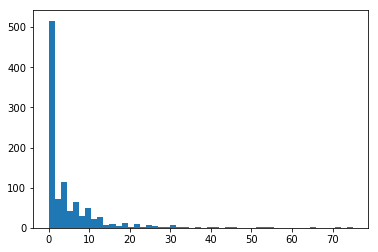

In [113]:
plt.hist(num_significant_real_pvalues, bins=50)
plt.show()

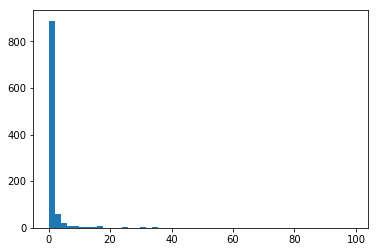

In [117]:
plt.hist(np.array(num_significant_shuffled_pvalues)[np.array(num_significant_shuffled_pvalues) < 100], bins=50)
plt.show()

In [105]:
sum(np.array(num_significant_real_pvalues) > 0)

608

In [102]:
sum(np.array(num_significant_shuffled_pvalues) > 0)

235